<a href="https://colab.research.google.com/github/srkpriyanka95/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Hotel Booking Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **GitHub Link**

https://github.com/srkpriyanka95/Hotel-Booking-Analysis.git

#**Problem Satement**

  Exploratory Data Analysis is a practicable tool  for a better understanding of data and its effects on other aspects of the business. With higher competition in the hotel industry, Hotel Booking Analysis would be helpful to get insights into the factors that govern bookings.

  We have a hotel dataset with 32 columns for two hotels, City hotels and Resort Hotels. In addition, we have data such as when the guest arrived, how long is the stay, what meals they ordered, is the booking canceled, customer type, marketing segment, and so on.  

  To do an Exploratory Data Analysis on this hotel data, we use python to get insights that would increase the booking, ways to reduce cancellations, and areas to focus on more.

  In this project, we do analyze and visualize different attributes that contribute to booking and cancelation, areas to concentrate more, which segment brings in more business, etc.,

#### **Define Your Business Objective?**

The main objective is to generate more revenue for the hotel and increase bookings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
#importing relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [4]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Let's load the data to be analysed
hotel=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Hotel Booking Analysis - Priyanka/Hotel Bookings.csv')

### Dataset First View

In [6]:
# Dataset First Look
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
hotel.shape

(119390, 32)

### Dataset Information

In [8]:
# Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#Different datatypes in dataframe
hotel.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

In [10]:
#Let's look how many years of data we have
hotel['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [11]:
#Its the start date of data
hotel[['arrival_date_day_of_month','arrival_date_year','arrival_date_month']].iloc[0]

arrival_date_day_of_month       1
arrival_date_year            2015
arrival_date_month           July
Name: 0, dtype: object

In [12]:
#Look the end date of data
hotel[['arrival_date_day_of_month','arrival_date_year','arrival_date_month']].iloc[-1]

arrival_date_day_of_month        29
arrival_date_year              2017
arrival_date_month           August
Name: 119389, dtype: object

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
len(hotel[hotel.duplicated()])

31994

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
hotel.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

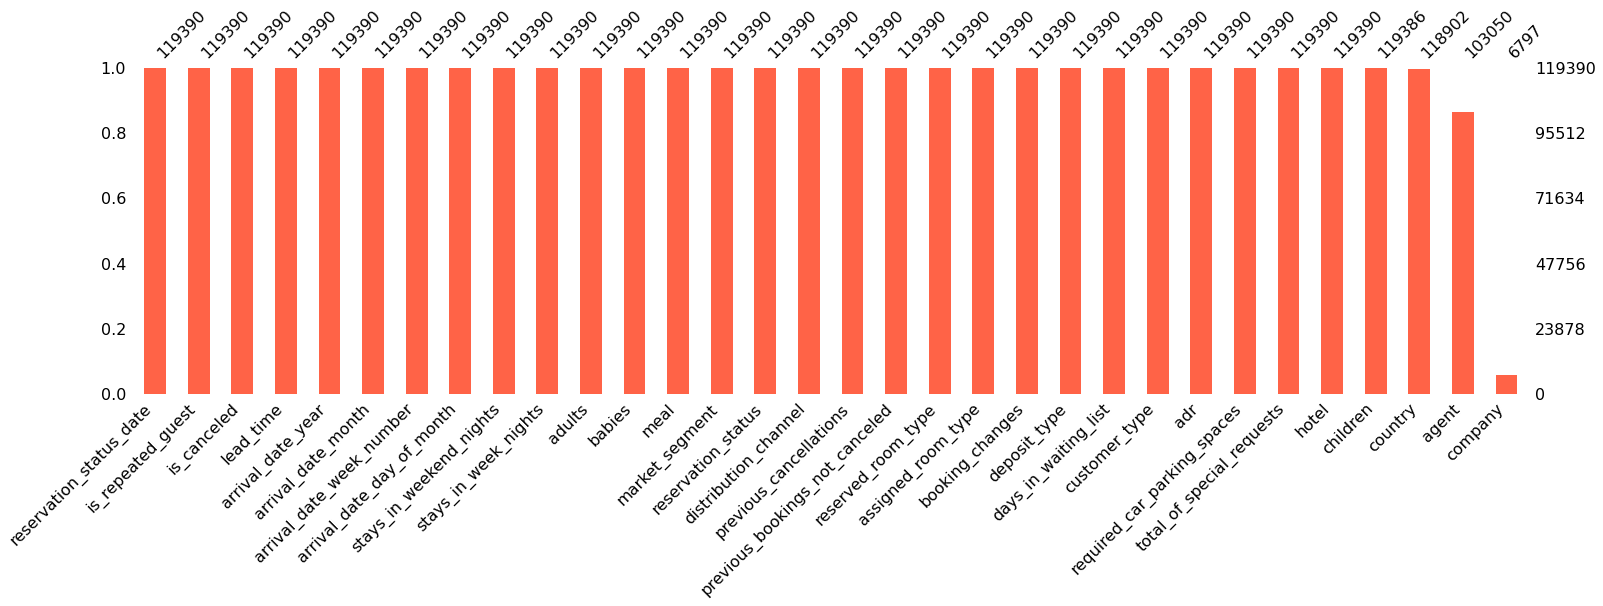

In [15]:
# Visualizing the missing values
msno.bar(hotel,figsize=(25,6),color="tomato", sort="descending")

### What did you know about your dataset?




* The dataset contains information about hotel booking, and we have to get insights into the factors that govern bookings
* The dataset contains 119390 observations and 32 columns.

* The dataset has null values in 4 columns.They are


> >>>
*   company - 112593
*   agent - 16340
*  country - 488 
*  children - 4



*   The dataset contains 31994 duplicates.
*  There are three datatypes in the data. They are


>>> 
*  int64
* float64
* object






*  The dataset has information for 3 years 2015,2016 and 2017
*   The start date of the data is 1st July 2015
*   The End date of the data is 29th August 2017












## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
# Dataset Describe
hotel.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [18]:
#describe for all numerical data
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

**Hotel:** City Hotel or Resort hotel

**Is_canceled:** Booking Cancelled - 1 & Booking not canceled-0

**Lead_time:**Days between booking and arrival date

**Arrival_date_year:** Arrival year

**Arrival_date_month:**Arrival month

**Arrival_date_week_number:** Arrival week number

**Arrival_date_day_of_month:** Arrival date

**Stays_in_weekend_nights:** Number of Weekend night stays

**Stays_in_week_nights:** Number of Weekday night stays

**Adults:** Number of Adults

**Children:** Number of Children

**Babies:** Number of Babies

**Meal:** Kind of Meal Preferred

**Country:** Coutry Code

**Market_segment:** Which segment does the customer belong to

**Distribution_channel:** How the customer accesed the stay

**Is_repeated_guest:** Repeated guest or not

**Previous_cancellations:** Has already cancelled bookings

**Previous_bookings_not_canceled:** Number of previous bookings not canceled

**Reserved_room_type:** Reserver room type

**Assigned_room_type:** Assigned room type

**Booking_changes:**Count of changes made to bookings

**Deposit_type:** Type of deposit

**Agent:** Agent for the booking

**Company:** Company

**Days_in_waiting_list:** Number of days in waiting list

**Customer_type:** Type of customer

**Adr:** Revenue Generated

**Required_car_parking_spaces:** Car parking required or not

**Total_of_special_requests:** Number of Special Request

**Reservation_status:** Reservation status

**Reservation_status_date:** Reservation status updated date

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
for column in list(hotel.columns):
  print(f'{column} - {hotel[column].nunique()} unique values')

hotel - 2 unique values
is_canceled - 2 unique values
lead_time - 479 unique values
arrival_date_year - 3 unique values
arrival_date_month - 12 unique values
arrival_date_week_number - 53 unique values
arrival_date_day_of_month - 31 unique values
stays_in_weekend_nights - 17 unique values
stays_in_week_nights - 35 unique values
adults - 14 unique values
children - 5 unique values
babies - 5 unique values
meal - 5 unique values
country - 177 unique values
market_segment - 8 unique values
distribution_channel - 5 unique values
is_repeated_guest - 2 unique values
previous_cancellations - 15 unique values
previous_bookings_not_canceled - 73 unique values
reserved_room_type - 10 unique values
assigned_room_type - 12 unique values
booking_changes - 21 unique values
deposit_type - 3 unique values
agent - 333 unique values
company - 352 unique values
days_in_waiting_list - 128 unique values
customer_type - 4 unique values
adr - 8879 unique values
required_car_parking_spaces - 5 unique values
t

## 3. ***Data Wrangling***

### Data Wrangling Code

Droping Duplicates

In [28]:
# Removing duplicates from the dataframe
hotel.drop_duplicates(inplace=True)

In [29]:
#Check whether the duplicates are removed
hotel.shape

(87396, 32)

 Dealing with Nulls

In [30]:
#country column has object datatype.SO, null values are replaced with No Data Entered
hotel.country.fillna('No Data Entered',inplace=True)
#all other 3 columns are of int data type so null values are replaced with 0
hotel.fillna(0,inplace=True)

In [31]:
#checking for nulls
hotel.isnull().any().unique()

array([False])

### What all manipulations have you done and insights you found?

* The data contained duplicates and null values in few columns
* All duplicate observations are dropped from the data
* Children,Country,Agent and Company columns had few null observations
* Null values in Childre,Agent and Company are replaced with 0. Because, the datatype of the column is float64.
* Null values in country column is replaced with 'Data Not Entered' because the datatype of the column is object.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 - Which hotel is preffered or booked more by customers?**

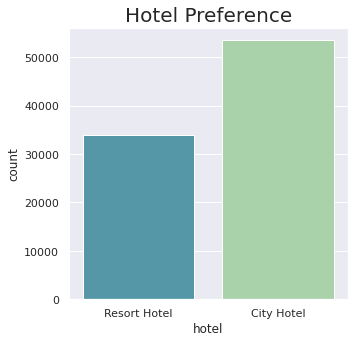

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [22]:
#Which type of hotels are booked more
sns.set(rc={"figure.figsize":(5, 5)})
sns.set_palette('Spectral_r')
#using count plot for visualisation
hotel_preference=sns.countplot(data=hotel,x='hotel')
hotel_preference.set_title('Hotel Preference',fontsize=20)
plt.show()
#using value_counts method to know the exact count
hotel['hotel'].value_counts()

##### 1. Why did you pick the specific chart?

The count plot shows us the count of the observations for each categorical variable. Count plot gives us a deeper understanding of how categorical variables are spread among the data. There are two types of hotels in the data. So it is better to know which hotel has more bookings or is preferred by the customers.

##### 2. What is/are the insight(s) found from the chart?

City hotels have more bookings than Resort hotel. The total count observations with resort hotel bookings are 33968 and for the city hotels are 53428. From the visualization it is clear that there are more bookings for city hotels than resort hotels by 20% approximately.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With the insights gained from the hotel preference chart, it is clear that city hotels have a higher tendency to get booked than resort hotels.

#### **Chart - 2 Percentage of booking being cancelled**

In [23]:
# importing plotly 
import plotly.express as px

In [24]:
#using value counts to know the count of bookings canceled and not canceled 
booking_cancellation = hotel['is_canceled'].value_counts().reset_index()
booking_cancekation_plot = px.pie(booking_cancellation,values=booking_cancellation['is_canceled'],names=['Not Cancelled','Cancelled'],color_discrete_sequence=px.colors.sequential.Mint,width=500,height=500)
booking_cancekation_plot.update_layout(title='Cancellation of Bookings',title_x=0.2,title_y=0.9)
booking_cancekation_plot.show()
print(booking_cancellation)

   index  is_canceled
0      0        63371
1      1        24025


##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. In this case, I want to know the percentage of bookings that are canceled or vice versa.

##### 2. What is/are the insight(s) found from the chart?

Around 72% of the bookings are unchanged, and 27.5% of the total bookings are canceled.
The number of bookings canceled is 24025

The number of bookings not canceled is 63371

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Booking cancellations are low when compared to bookings that booking not canceled. But there is 27.5% of cancellations. We should look into the factors related to or contributing to cancellations and work on those factors to decrease cancelations.

#### **Chart - 3 Different types of customers**

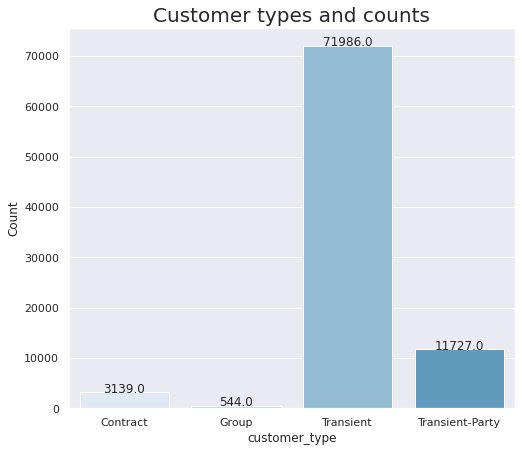

In [71]:
#using groupby to get the count of customer types
customer_type=hotel.groupby(['customer_type'],as_index=False)['hotel'].count()
customer_type.rename(columns={'hotel':'Count'},inplace=True)
#setting the figure size and palette
sns.set(rc={"figure.figsize":(8, 7)})
sns.set_palette('Blues')
# sns bar plot is used to know the count 
customer_plot=sns.barplot(data=customer_type,x='customer_type',y='Count')
customer_plot.set_title('Customer types and counts',fontsize=20)
#using annotate to print values over the bar
for n in customer_plot.patches:
  customer_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart shows the difference in the count of the categorical variables to total observations than other plots. These plots are easily comparable and precise. We have four different customer types in this case. The bar chart is the best-suited plot for this scenario.

##### 2. What is/are the insight(s) found from the chart?

There are four different customer types namely contract, group, Transient and Transient party. Most of the bookngs are done. by transient type of customers.
* 71986 observations are of transient type.

* 11727 observations are from Transient party type customers.

* 3139 observations are from contract type of customers.

* 544 observations are from group type of customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We should always know about the types of customers we have in the business. Which group of customers drives more business, and what measures should we take to make other customer types contribute more.

#### **Chart - 4 Distribution Channel**

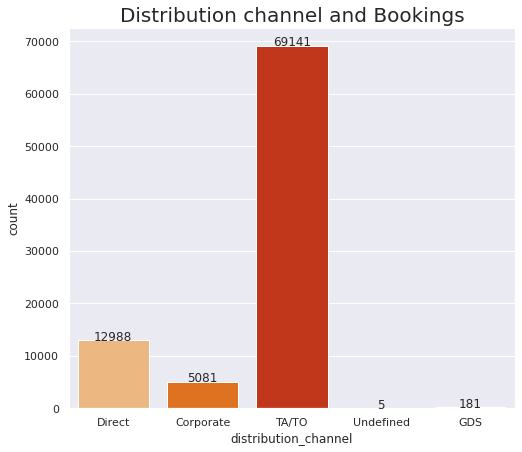

In [72]:
#using count plot to know about the market segment 
sns.set(rc={"figure.figsize":(8, 7)})
sns.set_palette('gist_heat_r')
distribution_channel_plot=sns.countplot(data=hotel,x='distribution_channel')
distribution_channel_plot.set_title('Distribution channel and Bookings',fontsize=20)
#using anotate to display values over the bar
for n in distribution_channel_plot.patches:
  distribution_channel_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

The distribution channel plot uses a count plot to know the count of bookings from different market segments. A count plot is best suited in cases like finding the count over different categorical values.

##### 2. What is/are the insight(s) found from the chart?

There are five different distribution channel in the data.They are direct,corporate, TA/TO, GDS and undefined.

* Direct - 12988
* Corporate - 5081
* TA/TO -69141
* GDS - 181
* undefined - 5


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Distribution channels are the chain that connects hotels and guests. The hotel business should always have a good relationship with the distribution channels to drive more business. With our insights from the chart, it is clear that more bookings are happening through TA/TO, and other distribution channels are not doing as well as them. We should plan a strategy or a campaign to increase the bookings through all distribution channels.

#### **Chart - 5 Deposit Type**

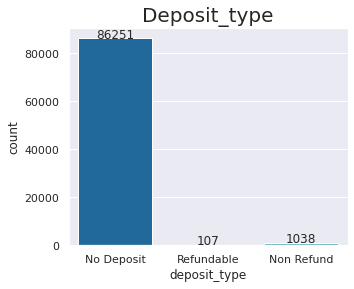

In [75]:
#using count plots to see bookings and deposit types
sns.set(rc={"figure.figsize":(5, 4)})
sns.set_palette('GnBu_r')
deposit_plot=sns.countplot(data=hotel,x='deposit_type')
deposit_plot.set_title('Deposit_type',fontsize=20)
for n in deposit_plot.patches:
  deposit_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

We used a count plot to interpret the count of bookings done by different deposit types. Count plots help with a more evident visual examination of the categorical data and their bookings.

##### 2. What is/are the insight(s) found from the chart?

There are three different modes of deposit types in the data
* No Deposit - 86251
* Refundable Deposit - 107
* Non Refund - 1038

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are more bookings with no deposit, which is almost 99% of the bookings.  So other deposit types are not preferred because no cash is the safest mode of payment in case they want to make any changes about the bookings.

This kind of no deposit can also lead to more cancelations. We should look how these types of deposits affect bookings.

#### **Chart - 6 Room Preference**

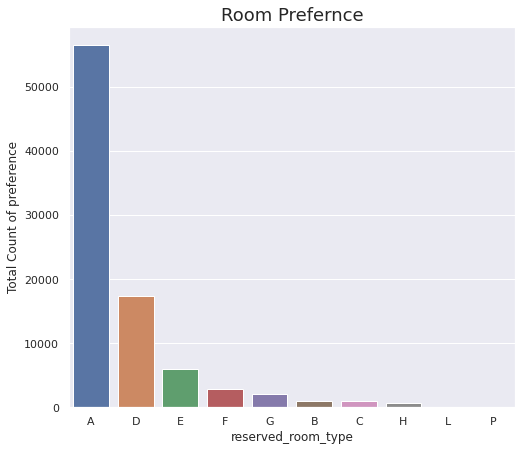

,reserved_room_type,hotel
0,A,56552
3,D,17398
4,E,6049
5,F,2823
6,G,2052
1,B,999
2,C,915
7,H,596
8,L,6
9,P,6


In [73]:
#using groupby function to get the count of room refernces
sns.set(rc={"figure.figsize":(8, 7)})
preferred_room=hotel.groupby(['reserved_room_type'],as_index=False)['hotel'].count().sort_values('hotel',ascending=False)
preferred_room_plot=sns.barplot(data=preferred_room,x='reserved_room_type',y='hotel')
preferred_room_plot.set_title('Room Prefernce',fontsize=18)
preferred_room_plot.set_ylabel('Total Count of preference')
plt.show()
preferred_room

##### 1. Why did you pick the specific chart?

The room preference chart gives us details about the count of bookings or people preferring the different types of rooms. The bar plot presents the difference in the counts of bookings over the types of rooms available.

##### 2. What is/are the insight(s) found from the chart?

There are 9 different room options in the hotel. But the most preferred room is type A with more bookings.
* A - 56552
* B - 999
* C - 915
* D - 17398
* E - 6049
* F - 2823
* G - 2052
* H - 596
* L - 6
* P - 6

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a considerable number of bookings for type A rooms, which is evident from the graph. This information helps us to pitch rooms with an offer in the off-season when the bookings are low. We know the room types which are not preferred most in the hotels, and we can use that source of information during peak seasons to promote more bookings, such as holiday seasons.

#### **Chart - 7 Meals preferred by the customers**

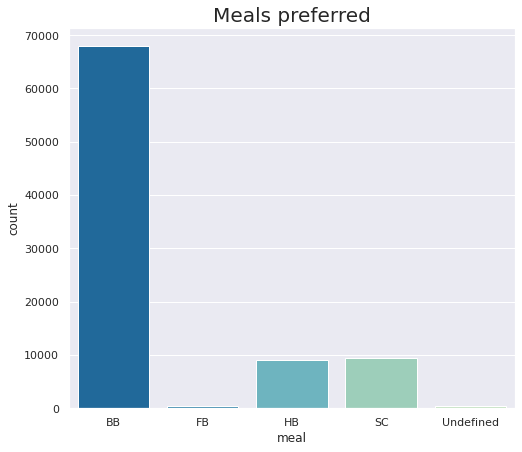

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64


In [29]:
#using count plot to see which type of meal is preferred
sns.set_palette('GnBu_r')
sns.countplot(data=hotel,x='meal')
plt.title('Meals preferred',fontsize=20)
plt.show()
print(hotel.meal.value_counts())

##### 1. Why did you pick the specific chart?

The meal preference chart holds information about meals preferred by the guest and their count. The Count plot is effective in this scenario because it gives us a clear picture of which meal is preferred mostly.

##### 2. What is/are the insight(s) found from the chart?

There are different kindas of meals provided in the hotel, the preference counts are
* BB - 67978
* SC - 9481
* HB - 9285
* Undefined - 492
* FB - 360

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To create a pleasant experience during the stay in a hotel is through personalized service based on the client's preferences, Which drives guests to revisit the place, which means more bookings. Meal preference by the guest is one key factor for customer satisfaction. We can improvise things at the workplace and run operations smoothly if we have a better idea about the client's preference.

#### **Chart - 8 How many clients have special requests**

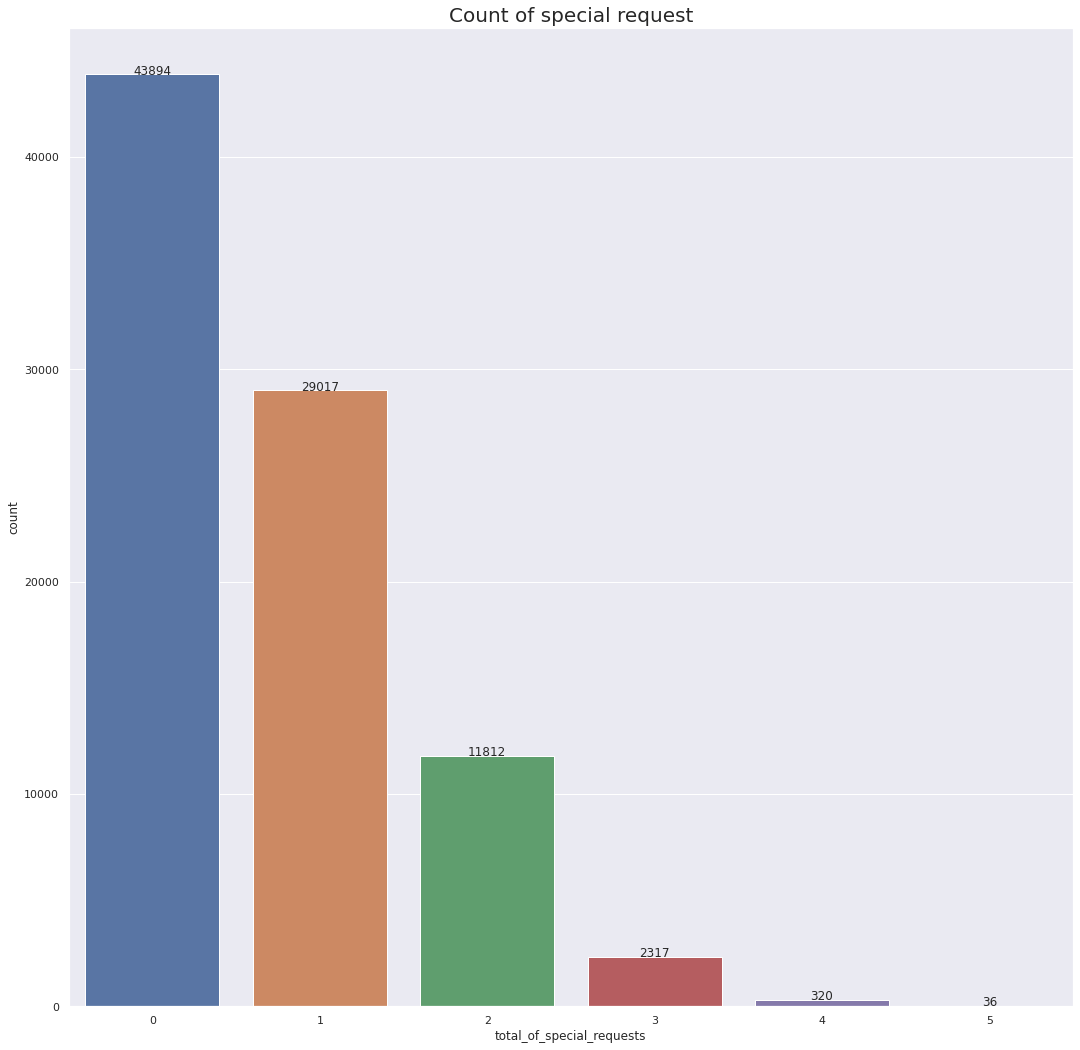

In [69]:
#Count of observations with number of special requests
special_req=sns.countplot(data=hotel,x='total_of_special_requests')
special_req.set_title('Count of special request',fontsize=20)
for n in special_req.patches:
  special_req.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is one of the best plots when we need to know the count of categorical variables in a data frame. We are counting the observations with the number of special requests requested by the guests during the booking. 

##### 2. What is/are the insight(s) found from the chart?

The maximun number of special request by the guest is 5.
The count of special requests are
* 0 request- 43894
* 1 request- 29017
* 2 requests-11812 
* 3 requests-2317
* 4 requests- 320
* 5 requests -36

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the insights from the plot,  it is clear that the majority of bookings have no special requests. But it is good to know about the special request during the booking time. Only a few bookings have a special request, and it's highly manageable with good planning and a better workforce.

#### **Chart - 9 Country from which most clients are from**

In [44]:
#Installing pycounty to get full names of the country from abbrevations
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
#Country names are not given in the data,it onl containa abbrevations.so,Lets get the country name using pycountry
import pycountry
#function to retun country names
def get_country_code(x):
    try:
        return pycountry.countries.get(alpha_3=x).name
    except:
        return "not found"
hotel['country_name'] = hotel.apply(lambda x:get_country_code(x['country']),axis=1)

In [46]:
#using groupby method to group country names and its bookings
country_wise_count=hotel.groupby(['country','country_name'],as_index=False)['hotel'].count().sort_values('hotel',ascending=False)
country_wise_count.rename(columns={'hotel':'Number_of_Bookings'},inplace=True)
#Removing country names with fewer bookings
country_wise_count.query('Number_of_Bookings>=100',inplace=True)
country_wise_count

,country,country_name,Number_of_Bookings
136,PRT,Portugal,27453
59,GBR,United Kingdom,10433
56,FRA,France,8837
51,ESP,Spain,7252
43,DEU,Germany,5387
81,ITA,Italy,3066
76,IRL,Ireland,3016
15,BEL,Belgium,2081
25,BRA,Brazil,1995
123,NLD,Netherlands,1911


In [66]:
import plotly.express as px
Country_wise=px.choropleth(country_wise_count,locations='country',color=np.log(country_wise_count['Number_of_Bookings']),hover_name=country_wise_count['country_name'],hover_data=country_wise_count[['Number_of_Bookings']],scope='world')
Country_wise.show()

##### 1. Why did you pick the specific chart?

A Chloropeth map is a type of map that shades the countries with different colors based on the values given to the corresponding country. We can also move through the map to know the numerical data given to the country. It is an intuitive map method to plot geographic data.

##### 2. What is/are the insight(s) found from the chart?

There are a lot of countries that contribute to bookings. Lets take a look at top few:
* Portugal	27453
*	United Kingdom	10433
*	France	8837
*	Spain	7252
*	Germany	5387
*	Italy	3066
*	Ireland	3016
*	Belgium	2081
* Brazil	1995
*	Netherlands	1911
*	United States	1875
*	Switzerland	1570


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When we have an idea about from which geographic location most customers come. With these details we can develop different marketing campaigns based on the booking for the dates made from a particular country is high. That would boost our bookings, and we get a great reach towards different countries. By doing this, we can get a wider audience for the business.

#### **Chart - 10 Number of cancellations over the years**

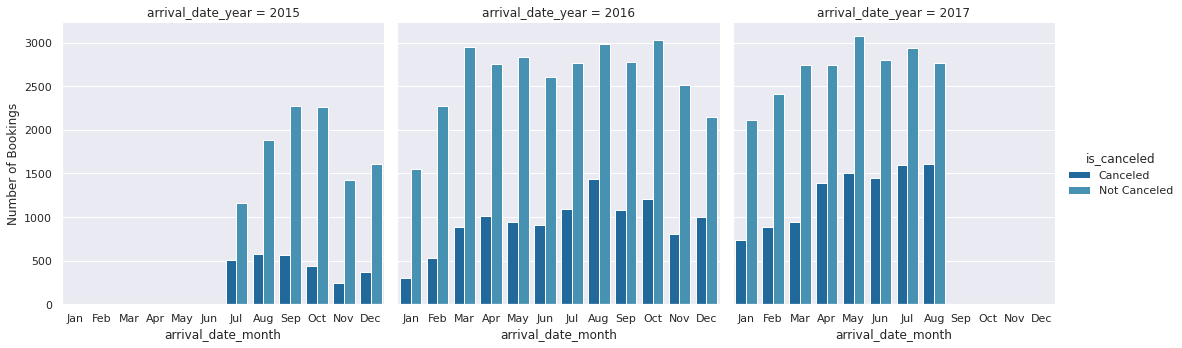

,arrival_date_year,arrival_date_month,is_canceled,Number of Bookings
36,2017,Jan,Canceled,737
37,2017,Jan,Not Canceled,2107
38,2017,Feb,Canceled,887
39,2017,Feb,Not Canceled,2405
40,2017,Mar,Canceled,944
41,2017,Mar,Not Canceled,2738
42,2017,Apr,Canceled,1395
43,2017,Apr,Not Canceled,2743
44,2017,May,Canceled,1501
45,2017,May,Not Canceled,3074


In [35]:
#Total bookings over months
#As arrival month data is string we are just replacing it temporarily for groupby
year_month=hotel.copy()
year_month.is_canceled.replace({0:'Not Canceled',1:'Canceled'},inplace=True)
month_wise_booking = year_month.replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11 ,'December':12}).groupby(['arrival_date_year','arrival_date_month','is_canceled'],as_index=False)['hotel'].count().sort_values(['arrival_date_year','arrival_date_month'],ascending=[False,True]).replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov' ,12:'Dec'})
month_wise_booking.rename(columns={'hotel':'Number of Bookings'},inplace=True)
#cat plot with hue is used to see the relationship between variables. Col is used to display values as seperate columns
bookings_over_months=sns.catplot(data=month_wise_booking,x='arrival_date_month',y='Number of Bookings',hue='is_canceled',col='arrival_date_year',kind='bar')
sns.set_palette("Set2")
plt.show()
month_wise_booking

##### 1. Why did you pick the specific chart?

The cat plot provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. Catplot helps to visualize the relationship between the number of bookings and cancelations during different months of the year.  Cat plots can give us a row or column with n number of graphs as per user input.

##### 2. What is/are the insight(s) found from the chart?

>2015


---
>*Non Canceled Bookings*
* The bookings are seeing a hike from July to October after November, and December sees a drop in the number of bookings.
* The number of cancellations per month in 2015 is less than 600 bookings.
* The graph starts from July because the dataset holds data from 1st July 2015.

>*Canceled Bookings*
*  August and September have more bookings cancelations, with around 600 cancellations.
* November has the minimum number of cancelations, which is 243 cancelations.
* The number of cancellations in 2015 is in the range of 250 to 600 booking cancellations.


>2016


---
>*Non Canceled Bookings*

* The bookings are high in March, August, and October, which is adjacent to 3000 bookings per month.
* The month with low bookings is January, with 1548 bookings.
* The non-canceled bookings range from 1500 to 3000 bookings per month.

>*Canceled Bookings*
* August has more bookings cancelations, with around 1442 cancellations.
* January has the minimum number of cancelations, which is 301 cancelations.
* The number of cancellations in 2016 is in the range of 300 to 1500 booking cancellations.
* The number of booking cancellations follows the same curve as the number of non-canceled bookings.

>2017


---
>*Non Canceled Bookings*
* May has more bookings, with around 3074 bookings.
* The bookings show signs of increase from January to June. After June, the graph sees a downhill but not by large numbers. 
* January has the lowest number of bookings not canceled, which is 2107 bookings.
* The non-canceled bookings in 2017 ranged from 2000 to 3000 bookings.

>*Canceled Bookings*
* There is a higher number of cancelations in July and August, which is around 1600 bookings.
* January has the minimum number of cancelations, which is 737 cancelations.
* The number of cancellations in 2017 is in the range of 700 to 1600 booking cancellations.
* The number of booking cancellations follows the same curve as 
non-canceled bookings.







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a good rise in the number of bookings not canceled when we see the data for all three years. There is a higher number of bookings from May to November. The bookings at year start and end are comparatively low compared to other months. We should put in some work to increase the bookings for the month with fewer bookings.

A consistent rise in booking cancellations is from the start to the end of the data. And few months have about 40% of bookings canceled compared to total bookings, which is not great for the business. We should learn the ropes about the factors for the increase in booking cancellations and take needy actions.

#### **Chart - 11 ADR over different months of the years**

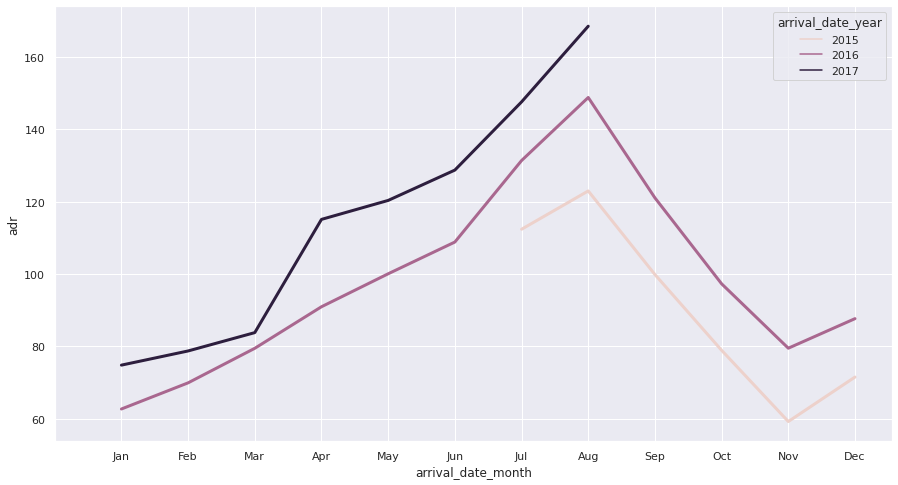

In [36]:
#line plot to see how adr changes with months
sns.set(rc={'figure.figsize':(15,8)})
adr_data=hotel.copy()
adr_data.replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11 ,'December':12},inplace=True)
r=sns.lineplot(data= adr_data , x='arrival_date_month',y='adr',hue='arrival_date_year',ci=None,linewidth=3)
r.set_xticks(range(13))
#x_tick labels are defined
r.set_xticklabels(['',"Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

##### 1. Why did you pick the specific chart?

A line plot visualizes the changes in two or more variables over the same period and shows the trends over a while. A line plot is the most suitable plot for picturizing the revenue generation for different months of the year.


##### 2. What is/are the insight(s) found from the chart?

The graph shows a continuous growth of ADR from the start of the year till August when the revenue generation is at its peak. Then there is a drop in revenue till November and shows growth in December.
The revenue generation is showing consistency year over year for every month. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Revenue generation is one of the most crucial metrics in a business. The extreme goal for any business is to increase revenue. To increase revenue, we tend to do a lot of advertisements and marketing campaigns throughout the year. Revenue generation is the only success measure that matters in business. Revenue generation tells us whether or not we are traveling in the right direction with our marketing efforts. 
In our case, it is clear that revenue generation has a steady growth year on year. But it follows the same pattern as the previous year. For instance, We have had more bookings in more than two months, but only August tends to have the peak revenue generation. We must come up with plans that drive more revenue into the business.

#### **Chart - 12 Market Segments and Adr**

   market_segment         hotel      adr
11      Online TA    City Hotel  4191731
12      Online TA  Resort Hotel  1908051
6          Direct  Resort Hotel   704297
5          Direct    City Hotel   671807
9   Offline TA/TO    City Hotel   634591
10  Offline TA/TO  Resort Hotel   501032
7          Groups    City Hotel   223305
3       Corporate    City Hotel   184146
8          Groups  Resort Hotel   146675
4       Corporate  Resort Hotel   102907
0        Aviation    City Hotel    22739


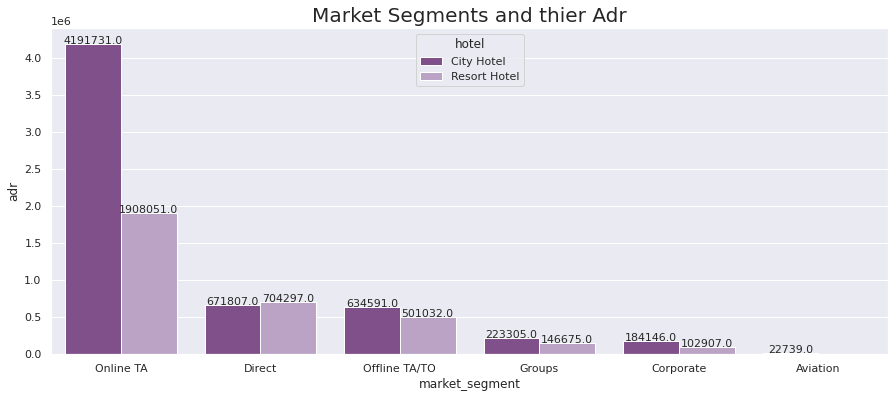

In [37]:
#groupby method is uses to find the total adr generated by each segment
market_segment_Adr = hotel.groupby(['market_segment','hotel'],as_index=False).agg({'adr':'sum'}).sort_values('adr',ascending=False)
market_segment_Adr['adr']=market_segment_Adr['adr'].apply(round)
#removing values that are having very low adr
msa = market_segment_Adr.query('adr>10000')
print(msa)
sns.set(rc={'figure.figsize':(15,6)})
sns.set_palette('PRGn')
market_segment_adr_plot=sns.barplot(data=msa,x='market_segment',y='adr',hue='hotel')
market_segment_adr_plot.set_title('Market Segments and thier Adr',fontsize=20)
#annotating the vakues of the bar
for n in market_segment_adr_plot.patches:
  market_segment_adr_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=11)
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart provides a clear visual representation of categorical variables for the data. A bar chart with hue helps with the effortless comparison between different variables in a single go. 

##### 2. What is/are the insight(s) found from the chart?

The different marketing segments and thier revenue generation are:
* Online TA is the market segment that generates higher adr for both the hotels.
> * City  hotel - 4191731
  * Resort hotel - 190805
* Direct generates the second highest adr
> * City  hotel - 671807
  * Resort hotel - 704297
* Offline markt segment is the third segment in generating adr
> * City  hotel - 634591
  * Resort hotel - 501032
* All other segments such as, Groups, Corporate  and Aviation contribute a little towards the adr generation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph, it is clear that higher revenue generation is by the online market segment. Direct and offline market segments are generating the second highest revenue-generating market segments. If the online market is bringing in more revenue, we can evaluate the results of the existing online advertisement plans and create new campaigns with the results we have.

#### **Chart - 13  Market Segments and Cancelations**

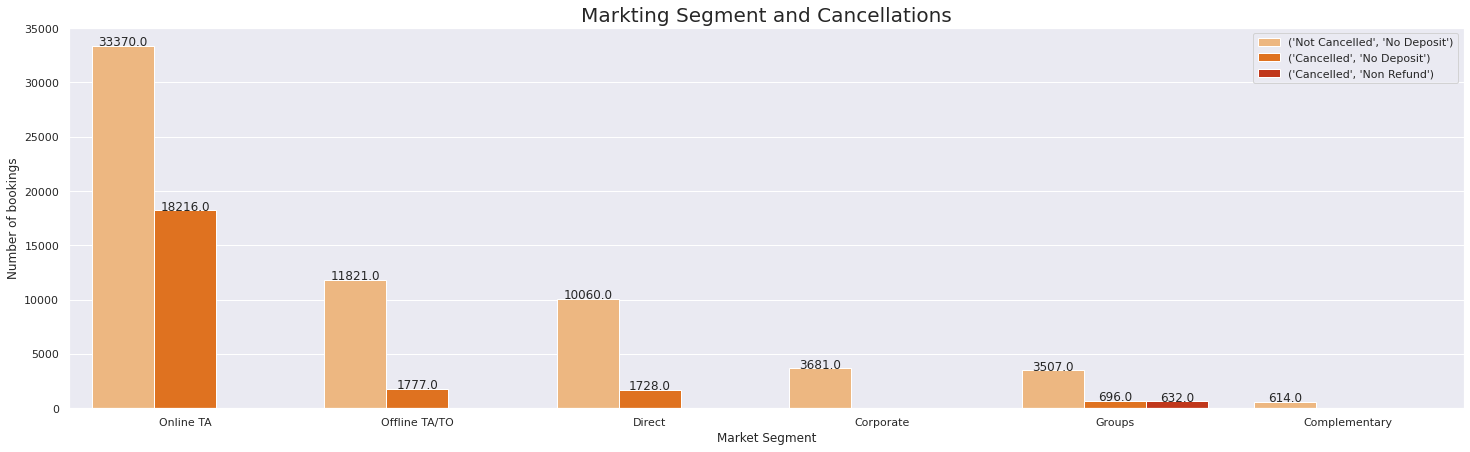

In [38]:
#groupby is used to subset values based on needs
market_segment_and_cancellations=hotel.groupby(['market_segment','deposit_type','is_canceled'],as_index=False)['hotel'].count().sort_values('hotel',ascending=False).query('hotel>500')
market_segment_and_cancellations['is_canceled'].replace({0:'Not Cancelled',1:'Cancelled'},inplace=True)
sns.set(rc={"figure.figsize":(25, 7)})
sns.set_palette('gist_heat_r')
#bar plot id used to generate the plot
market_segment_and_cancellations_plot=sns.barplot(data=market_segment_and_cancellations,x='market_segment',y='hotel', hue=market_segment_and_cancellations[['is_canceled','deposit_type']].apply(tuple,axis=1))
market_segment_and_cancellations_plot.set_xlabel('Market Segment',fontsize=12)
market_segment_and_cancellations_plot.set_ylabel('Number of bookings',fontsize=12)
market_segment_and_cancellations_plot.set_title('Markting Segment and Cancellations',fontsize=20)
#corresponding bar values are annotated
for n in market_segment_and_cancellations_plot.patches:
  market_segment_and_cancellations_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart provides a clear visual representation of categorical variables for the data. A bar chart with hue helps with the effortless comparison between different variables in a single go.

##### 2. What is/are the insight(s) found from the chart?

With insights from previous charts, the highest number of bookings are from online TA. But let's see which marketing segment tends to cancel more and what type of deposit method is preferred during bookings. 
* online TA tends to book more through no deposit type
> * 33370 bookings are made with no deposit type
> * 18216 bookings with no deposit type are canceled


* offline TA also has more bookings with no deposit type
> * 11821 bookings are made with no deposit type
> * 1777 bookings with no deposit type are canceled

* Direct marketing segment also has more bookings with no deposit type
> * 10060 bookings are made with no deposit type
> * 1728 bookings with no deposit type are canceled


* Corporate marketing segment has 3681 bookings with no deposit type

* Groups make use of no deposit and non-refundable deposit type
> * 3507 bookings are made with no deposit type
> * 696 bookings with no deposit type are canceled
> * 632 bookings are through non-refundable deposit type

* Complementary market segment has 614 bookings done through no deposit type



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The majority of the bookings prefer no deposit from different market types. The factor behind the booking cancellations may be the deposit type. As many bookings are from no deposit type, guests tend to cancel more often. For instance: More than 35% of the bookings from online market segment is cancelled becaus of no deposit type.

#### **Chart - 14 Rooms allotment**

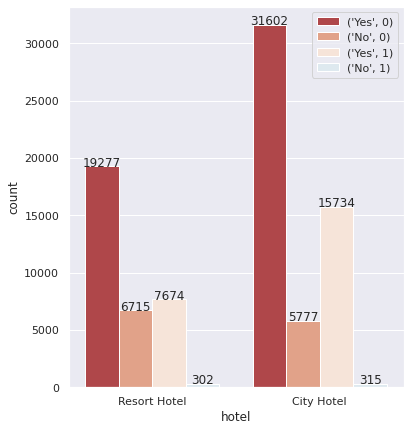

In [37]:
#writing a functionn to return value 1 if the reserved room and assigned room are same else it eill return 0
def same(n,x):
  try:
    if (n == x):
      return 1
    else :
      return 0
  except:
    return 0
hotel['same_rooms_assigned'] = hotel.apply((lambda x: same(x['assigned_room_type'],x['reserved_room_type'])),axis=1)
#Creating a copy of the dataset can be helpful in case we have boolean values in our columns because it will return an error when we try to use plots.
room_type=hotel.copy()
room_type['same_rooms_assigned'].replace({0:'No',1:'Yes'},inplace=True)
sns.set(rc={'figure.figsize':(6,7)})
sns.set_palette('RdBu')
same_room_plot=sns.countplot(data=room_type,x='hotel',hue=room_type[['same_rooms_assigned','is_canceled']].apply(tuple,axis=1))
for n in same_room_plot.patches:
  same_room_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart shows the difference in the count of the categorical variables to total observations than other plots. These plots are easily comparable and precise. The bar chart is the best-suited plot to compare the room allotments and their cancellations.


##### 2. What is/are the insight(s) found from the chart?

*Resort Hotel*


---

* Same room alloted and not cancelled - 19277
* Same room not alloted and not cancelled - 6715
* Same room alloted and cancelled - 7674
* Same room not alloted and cancelled - 302

*City Hotel*


---
* Same room alloted and not cancelled - 31602
* Same room not alloted and not cancelled - 5777
* Same room alloted and cancelled - 15734
* Same room not alloted and cancelled - 315



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above it is clear that, there is no relationship with the room allotment and cancellation in both the hotels.

#### **Chart - 15 Adr and total stay**

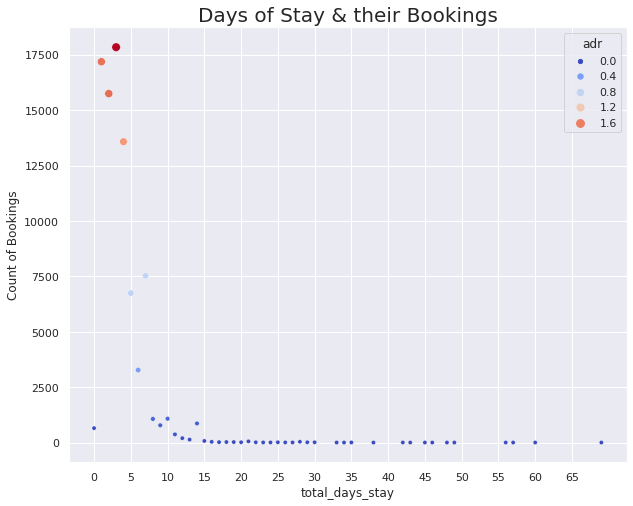

,total_days_stay,No. of Bookings,adr
0,0,651,0.00
1,1,17184,1655377.96
2,2,15745,1673159.77
3,3,17839,1978053.15
4,4,13575,1482608.73
5,5,6742,772719.93
6,6,3271,400028.34
7,7,7527,808690.78
8,8,1067,124484.56
9,9,780,90684.23


In [35]:
# total stay column is ccreated to know how long did the customers stay
hotel['total_days_stay']=hotel['stays_in_week_nights']+hotel['stays_in_weekend_nights']
sns.set(rc={'figure.figsize':(10,8)})
stay=hotel.groupby(['total_days_stay'],as_index=False).agg({'hotel':'count','adr':'sum'})
stay.rename(columns={'hotel':'No. of Bookings'},inplace=True)
#scatter plot 
stay_plot=sns.scatterplot(data=stay,x='total_days_stay',y='No. of Bookings',size='adr',palette='coolwarm',hue='adr')
stay_plot.set_ylabel('Count of Bookings')
stay_plot.set_xticks(range(0,70,5))
stay_plot.set_title('Days of Stay & their Bookings',fontsize=20)
plt.show()
stay

##### 1. Why did you pick the specific chart?

A Scatter plot gives two-dimensional graphics and amplifies by mapping up to three additional variables while using the semantics of hue, size, and style parameters. All the parameter control visual semantics helps to identify the different subsets. Using redundant semantics can help make graphics more accessible.

##### 2. What is/are the insight(s) found from the chart?

* Most of the bookings are for stay less than 5 days have high adr and number of bookings 
* Number of bookings ranges from 12000 to 18000 bookings
* The next highest revenue generating stay is between 5 to 10 days.
* Longer stay has very few number of bookings and generates lesser revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bookings for guests staying for less than five days are higher and generate higher revenue than bookings for longer stays. The revenue generation is directly proportional to the number of bookings. As bookings are high for  less than ten days, they contribute more towards revenue. Guests prefer a shoterr stay in the hotel.

### **Chart - 16 Agent, Booking Count and ADR**

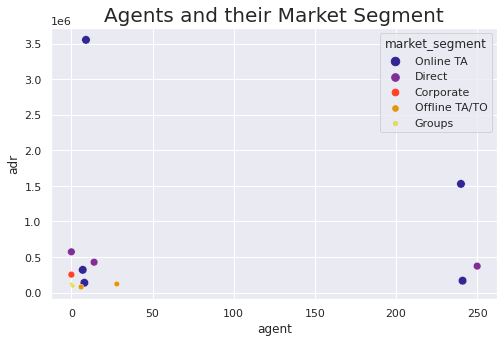

,agent,market_segment,hotel,adr
32,9,Online TA,28751,3552171
319,240,Online TA,12997,1527619
3,0,Direct,5605,572527
44,14,Direct,3349,426354
333,250,Direct,2776,371413
26,7,Online TA,3300,318976
2,0,Corporate,3687,251931
322,241,Online TA,1630,166293
29,8,Online TA,1120,137334
66,28,Offline TA/TO,1502,119731


In [41]:
#There are 333 agents in total but let's  focus on agents who bring in more bookings and adr
agent=hotel.groupby(['agent','market_segment'],as_index=False).agg({'hotel':'count','adr':'sum'}).sort_values(['adr','hotel'],ascending=[False,False])
agent['agent']=agent['agent'].apply(round)
agent['adr']=agent['adr'].apply(round)
#getting details od agent who makes bookings more than 1000 bookings
agent_final=agent.query('hotel>1000')
#Which market segment does these agents come from
sns.set(rc={'figure.figsize':(8,5)})
sns.scatterplot(data=agent_final,x='agent',y='adr',hue='market_segment',palette='CMRmap',size='market_segment')
plt.title('Agents and their Market Segment',fontsize=20)
plt.show()
agent_final

##### 1. Why did you pick the specific chart?

A Scatter plot gives two-dimensional graphics and amplifies by mapping up to three additional variables while using the semantics of hue, size, and style parameters. All the parameter control visual semantics helps to identify the different subsets. Using redundant semantics can help make graphics more accessible.

##### 2. What is/are the insight(s) found from the chart?

Top four agents with higher Revenue genration are:

*Agent  9*


---
		
>* Market Segment - Online TA
>* Number of Bookings - 28751
>* ADR - 3552171

*Agent 240*


---

>* Market Segment - Online TA
>* Number of Bookings - 12997
>* ADR - 1527619

*Agent 14*

---

>* Market Segment - Direct
>* Number of Bookings - 3349
>* ADR -	426354

*Agent 250*


---
>* Market Segment - Direct
>* Number of Bookings - 2776
>* ADR - 371413

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The agents that generate more revenue fall into online and direct market segments. This booking scenario entirely comes to the marketing and advertising efforts of the business. A better online presence would ideally generate more bookings for the hotel. 




### **Chart - 17 correlation Heatmap**

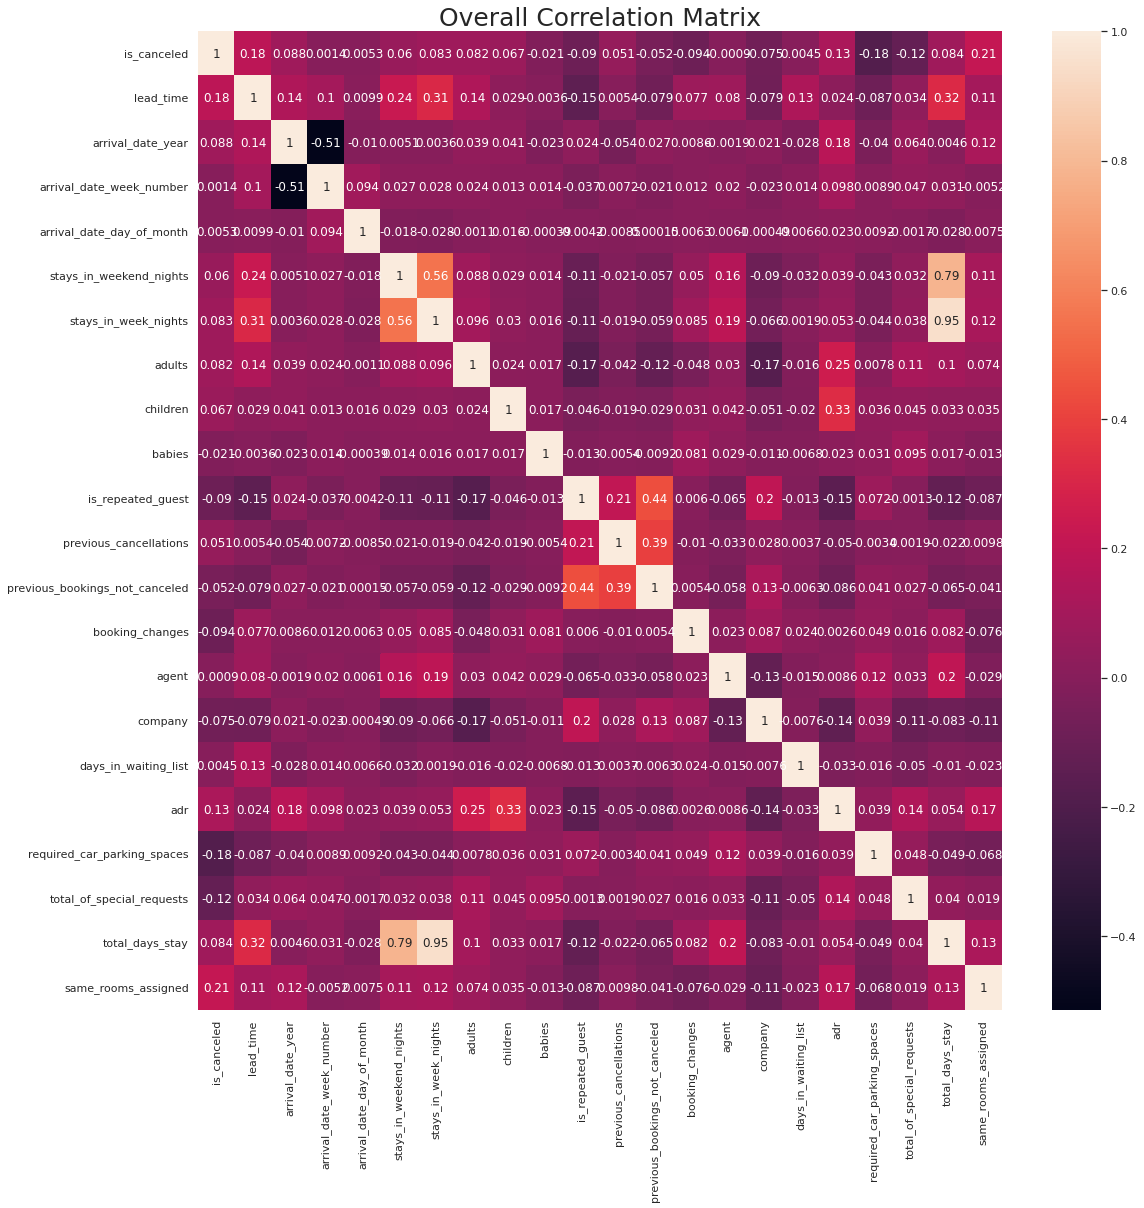

In [43]:
#Plotting the correlation with heatmap to have a visualisation of the correlation
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(hotel.corr(),annot=True)
plt.title("Overall Correlation Matrix",fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?


A correlation heatmap shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The correlation heatmap uses different colors to indicate the relationship between the variables. Heatmap helps in the faster interpretation of the relationships between the variable.

##### 2. What is/are the insight(s) found from the chart?

The correlation values range from -0.1 to 0.95 among different variables.
The variables in the chart are not highly correlated with each other. They express a very low correlation with each other.
Days in waiting list is nor correlated with cancellations.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

* The number of bookings and asr is high in August. We can promote bookings in other months with exciting offers while the bookings are low.


* The number of booking cancellations is due to the no-deposit option in the deposit type. Implement deposit rate for bookings will reduce cancellations.


* The contribution of marketing channels is low other than the online channel. Develop a marketing strategy to promote bookings.

* Most of the bookings are through online channels, so effective advertisement and online presence drive more bookings.

# **Conclusion**

* The number of bookings is high for city hotels compared to Resort hotels.
* The percentage of bookings canceled is 27.5%, and 72.5% remains unchanged.
* Transient type of customers makes up the majority of the bookings.
* TA/TO, Direct, and Corporate is the distribution channel for the hotel.
* Maximum bookings are with no deposit type, which is one of the factors for cancellation.
* The most preferred room in both the hotel is a type A room.
* The most preferred meal is BB meal.
* The maximum number of special requests is 5. The majority of the bookings don't have any special requests.
* European countries like Portugal, the United Kingdom, France, and Spain tend to make more bookings.
* The cancellations show consistent growth year on year alongside the increase in bookings for the hotel.
* The highest revenue generated is in August compared to other months.
* The market segment with a higher booking is Online TA, but also with a higher number of cancellations compared to other market segments.
* Staying less than ten days has more bookings and generates higher revenue.
* Days on the waiting list is not having a relationship with cancellation.




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***